Multi-channel CSC
=================

This example demonstrates solving a convolutional sparse coding problem with a greyscale dictionary and a colour signal [[57]](http://sporco.rtfd.org/en/latest/zreferences.html#id61)

  $$\mathrm{argmin}_\mathbf{x} \; (1/2) \sum_c \left\| \sum_m \mathbf{d}_m * \mathbf{x}_{c,m} - \mathbf{s}_c \right\|_2^2 + \lambda \sum_c \sum_m \| \mathbf{x}_{c,m} \|_1 + \mu \| \{ \mathbf{x}_{c,m} \} \|_{2,1} \;,$$

where $\mathbf{d}_{m}$ is the $m^{\text{th}}$ dictionary filter, $\mathbf{x}_{c,m}$ is the coefficient map corresponding to the $m^{\text{th}}$ dictionary filter and channel $c$ of the input image, and $\mathbf{s}_c$ is channel $c$ of the input image.

In [1]:
from __future__ import print_function
from builtins import input

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco import util
from sporco import signal
from sporco import plot
plot.config_notebook_plotting()
import sporco.metric as sm
from sporco.admm import cbpdn

Load example image.

In [2]:
img = util.ExampleImages().image('kodim23.png', scaled=True,
                                idxexp=np.s_[160:416,60:316])

Highpass filter example image.

In [3]:
npd = 16
fltlmbd = 10
sl, sh = signal.tikhonov_filter(img, fltlmbd, npd)

Load greyscale dictionary and display it.

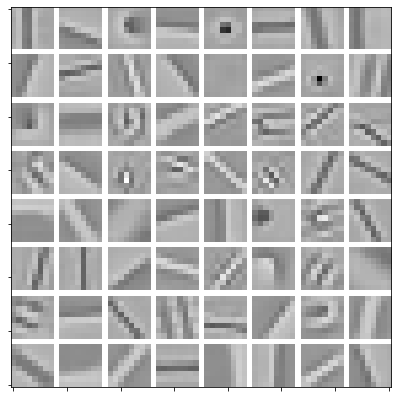

In [4]:
D = util.convdicts()['G:8x8x64']
plot.imview(util.tiledict(D), fgsz=(7, 7))

Set [admm.cbpdn.ConvBPDNJoint](http://sporco.rtfd.org/en/latest/modules/sporco.admm.cbpdn.html#sporco.admm.cbpdn.ConvBPDNJoint) solver options.

In [5]:
lmbda = 1e-1
mu = 1e-2
opt = cbpdn.ConvBPDNJoint.Options({'Verbose': True, 'MaxMainIter': 200,
                              'RelStopTol': 5e-3, 'AuxVarObj': False})

Initialise and run CSC solver.

In [6]:
b = cbpdn.ConvBPDNJoint(D, sh, lmbda, mu, opt, dimK=0)
X = b.solve()
print("ConvBPDNJoint solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       DFid      Regℓ1     Regℓ2,1   r         s         ρ       
--------------------------------------------------------------------------


   0  5.27e+02  3.05e+00  4.94e+03  2.98e+03  9.94e-01  2.99e-02  6.00e+00


   1  4.49e+02  1.67e+01  4.08e+03  2.46e+03  9.07e-01  1.47e-01  6.00e+00


   2  3.68e+02  3.33e+01  3.16e+03  1.91e+03  4.83e-01  2.81e-01  1.05e+01


   3  3.46e+02  4.16e+01  2.87e+03  1.74e+03  2.74e-01  2.49e-01  1.05e+01


   4  3.47e+02  4.08e+01  2.88e+03  1.76e+03  2.32e-01  1.57e-01  7.81e+00


   5  3.13e+02  4.02e+01  2.57e+03  1.60e+03  2.05e-01  1.17e-01  6.71e+00


   6  2.80e+02  4.11e+01  2.25e+03  1.41e+03  1.71e-01  9.00e-02  6.71e+00


   7  2.56e+02  4.30e+01  2.01e+03  1.26e+03  1.40e-01  7.11e-02  6.71e+00


   8  2.42e+02  4.49e+01  1.85e+03  1.17e+03  1.12e-01  6.00e-02  6.71e+00


   9  2.35e+02  4.62e+01  1.77e+03  1.12e+03  9.08e-02  5.24e-02  6.71e+00


  10  2.29e+02  4.68e+01  1.71e+03  1.08e+03  7.58e-02  4.58e-02  6.71e+00


  11  2.23e+02  4.70e+01  1.66e+03  1.05e+03  6.81e-02  4.05e-02  6.11e+00


  12  2.17e+02  4.71e+01  1.60e+03  1.01e+03  5.90e-02  3.60e-02  6.11e+00


  13  2.11e+02  4.73e+01  1.54e+03  9.78e+02  5.47e-02  3.18e-02  5.53e+00


  14  2.06e+02  4.76e+01  1.49e+03  9.48e+02  4.82e-02  2.82e-02  5.53e+00


  15  2.01e+02  4.80e+01  1.44e+03  9.19e+02  4.25e-02  2.56e-02  5.53e+00


  16  1.98e+02  4.83e+01  1.40e+03  8.98e+02  3.96e-02  2.37e-02  5.04e+00


  17  1.96e+02  4.85e+01  1.38e+03  8.85e+02  3.55e-02  2.16e-02  5.04e+00


  18  1.94e+02  4.86e+01  1.37e+03  8.77e+02  3.38e-02  1.97e-02  4.57e+00


  19  1.93e+02  4.87e+01  1.36e+03  8.69e+02  3.09e-02  1.80e-02  4.57e+00


  20  1.91e+02  4.87e+01  1.34e+03  8.56e+02  2.82e-02  1.66e-02  4.57e+00


  21  1.88e+02  4.87e+01  1.31e+03  8.40e+02  2.58e-02  1.55e-02  4.57e+00


  22  1.86e+02  4.88e+01  1.29e+03  8.25e+02  2.50e-02  1.45e-02  4.16e+00


  23  1.84e+02  4.89e+01  1.27e+03  8.14e+02  2.32e-02  1.34e-02  4.16e+00


  24  1.82e+02  4.90e+01  1.25e+03  8.04e+02  2.16e-02  1.24e-02  4.16e+00


  25  1.81e+02  4.92e+01  1.24e+03  7.95e+02  2.01e-02  1.16e-02  4.16e+00


  26  1.80e+02  4.93e+01  1.23e+03  7.87e+02  1.87e-02  1.10e-02  4.16e+00


  27  1.78e+02  4.93e+01  1.21e+03  7.79e+02  1.75e-02  1.04e-02  4.16e+00


  28  1.77e+02  4.94e+01  1.20e+03  7.71e+02  1.65e-02  9.85e-03  4.16e+00


  29  1.76e+02  4.94e+01  1.19e+03  7.63e+02  1.55e-02  9.36e-03  4.16e+00


  30  1.75e+02  4.95e+01  1.18e+03  7.55e+02  1.53e-02  8.85e-03  3.79e+00


  31  1.74e+02  4.96e+01  1.17e+03  7.49e+02  1.45e-02  8.37e-03  3.79e+00


  32  1.73e+02  4.96e+01  1.16e+03  7.43e+02  1.38e-02  7.92e-03  3.79e+00


  33  1.72e+02  4.97e+01  1.15e+03  7.37e+02  1.30e-02  7.51e-03  3.79e+00


  34  1.71e+02  4.98e+01  1.14e+03  7.32e+02  1.24e-02  7.17e-03  3.79e+00


  35  1.70e+02  4.98e+01  1.13e+03  7.28e+02  1.18e-02  6.84e-03  3.79e+00


  36  1.70e+02  4.99e+01  1.13e+03  7.24e+02  1.12e-02  6.50e-03  3.79e+00


  37  1.69e+02  4.99e+01  1.12e+03  7.21e+02  1.07e-02  6.18e-03  3.79e+00


  38  1.69e+02  5.00e+01  1.12e+03  7.17e+02  1.02e-02  5.92e-03  3.79e+00


  39  1.68e+02  5.00e+01  1.11e+03  7.12e+02  9.70e-03  5.70e-03  3.79e+00


  40  1.67e+02  5.01e+01  1.10e+03  7.08e+02  9.26e-03  5.48e-03  3.79e+00


  41  1.67e+02  5.01e+01  1.10e+03  7.04e+02  8.85e-03  5.24e-03  3.79e+00


  42  1.66e+02  5.02e+01  1.09e+03  7.00e+02  8.47e-03  5.02e-03  3.79e+00


  43  1.66e+02  5.02e+01  1.08e+03  6.97e+02  8.11e-03  4.81e-03  3.79e+00


  44  1.65e+02  5.02e+01  1.08e+03  6.94e+02  7.77e-03  4.61e-03  3.79e+00


  45  1.65e+02  5.03e+01  1.07e+03  6.91e+02  7.43e-03  4.43e-03  3.79e+00


  46  1.64e+02  5.03e+01  1.07e+03  6.88e+02  7.12e-03  4.25e-03  3.79e+00


  47  1.64e+02  5.03e+01  1.07e+03  6.86e+02  6.83e-03  4.08e-03  3.79e+00


  48  1.63e+02  5.04e+01  1.06e+03  6.83e+02  6.54e-03  3.93e-03  3.79e+00


  49  1.63e+02  5.04e+01  1.06e+03  6.81e+02  6.56e-03  3.79e-03  3.45e+00


  50  1.63e+02  5.04e+01  1.06e+03  6.78e+02  6.32e-03  3.65e-03  3.45e+00


  51  1.62e+02  5.04e+01  1.05e+03  6.76e+02  6.10e-03  3.51e-03  3.45e+00


  52  1.62e+02  5.05e+01  1.05e+03  6.74e+02  5.88e-03  3.37e-03  3.45e+00


  53  1.62e+02  5.05e+01  1.05e+03  6.73e+02  5.67e-03  3.22e-03  3.45e+00


  54  1.62e+02  5.05e+01  1.04e+03  6.70e+02  5.46e-03  3.10e-03  3.45e+00


  55  1.61e+02  5.05e+01  1.04e+03  6.68e+02  5.25e-03  2.99e-03  3.45e+00


  56  1.61e+02  5.06e+01  1.04e+03  6.66e+02  5.06e-03  2.89e-03  3.45e+00


  57  1.61e+02  5.06e+01  1.03e+03  6.65e+02  4.88e-03  2.80e-03  3.45e+00
--------------------------------------------------------------------------
ConvBPDNJoint solve time: 43.68s


Reconstruct image from sparse representation.

In [7]:
shr = b.reconstruct().squeeze()
imgr = sl + shr
print("Reconstruction PSNR: %.2fdB\n" % sm.psnr(img, imgr))

Reconstruction PSNR: 32.82dB



Display low pass component and sum of absolute values of coefficient maps of highpass component.

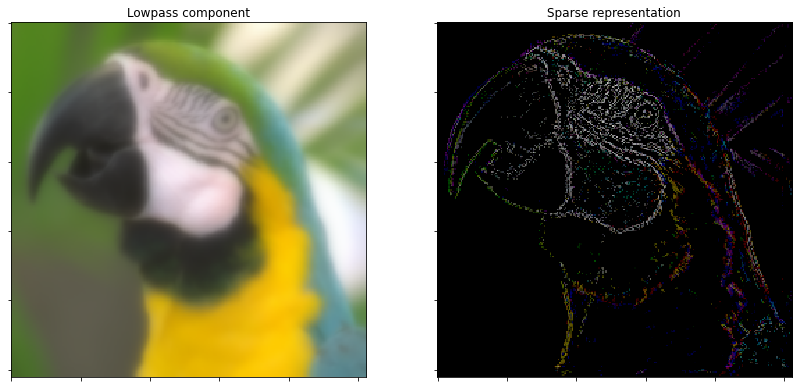

In [8]:
gamma = lambda x, g: x**g
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(sl, title='Lowpass component', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(gamma(np.sum(abs(X), axis=b.cri.axisM).squeeze(), 0.4),
            title='Sparse representation', fig=fig)
fig.show()

Display original and reconstructed images.

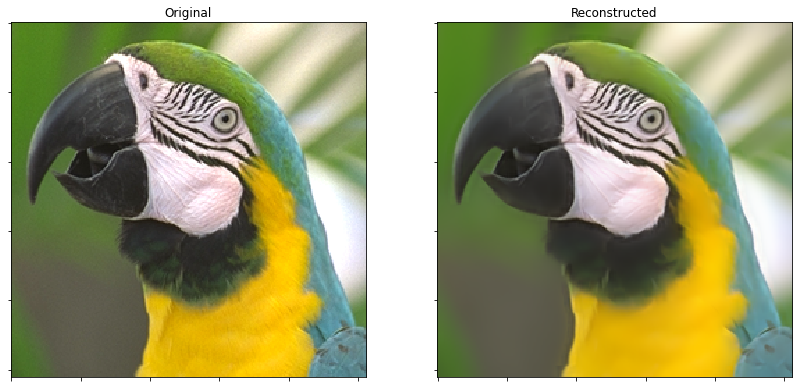

In [9]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(img, title='Original', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(imgr, title='Reconstructed', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

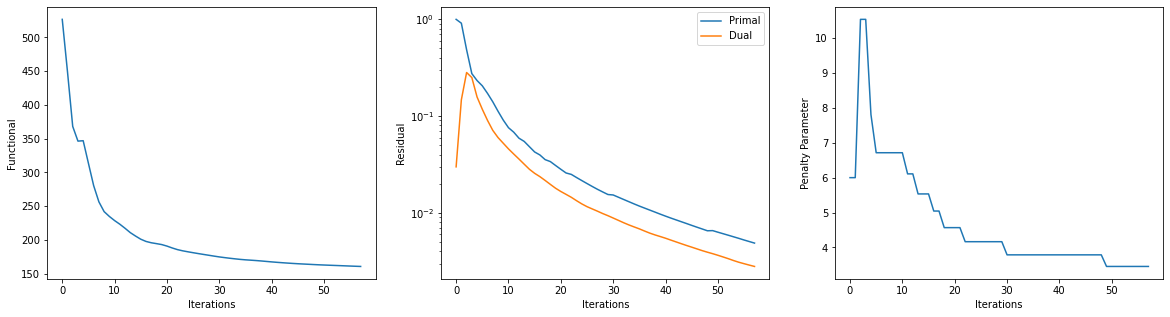

In [10]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()